<a href="https://colab.research.google.com/github/zakihir0/first-commit/blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/zakihir0/first-commit.git

Cloning into 'first-commit'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 57 (delta 25), reused 6 (delta 0), pack-reused 0
Unpacking objects: 100% (57/57), done.


In [2]:
!pip install optuna
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 7.1 MB/s 
     |████████████████████████████████| 81 kB 11.3 MB/s 
     |████████████████████████████████| 209 kB 69.0 MB/s 
     |████████████████████████████████| 78 kB 8.1 MB/s 
     |████████████████████████████████| 147 kB 79.7 MB/s 
     |████████████████████████████████| 50 kB 7.3 MB/s 
     |████████████████████████████████| 112 kB 74.4 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=c9b54c62537379b21023cadf03c9cc4a6172915a9b1eab9a10df87bc308be663
  Stored in directory: /root/.cache/pip/wheels/7f/1a/65/84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import os
import glob
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import (roc_curve, auc)
import matplotlib.pyplot as plt
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import EditedNearestNeighbours
from collections import Counter
import glob
import os

import matplotlib.pyplot as plt
import numpy as np
import optuna
import pandas as pd
import seaborn as sns
from imblearn.under_sampling import ClusterCentroids
from optuna.integration import lightgbm as lgb
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (PrecisionRecallDisplay, RocCurveDisplay,
                             accuracy_score, adjusted_mutual_info_score,
                             adjusted_rand_score, auc, average_precision_score,
                             balanced_accuracy_score, brier_score_loss,
                             calinski_harabasz_score, check_scoring,
                             classification_report, cluster, cohen_kappa_score,
                             completeness_score, confusion_matrix,
                             consensus_score, coverage_error, d2_tweedie_score,
                             davies_bouldin_score, dcg_score, det_curve,
                             euclidean_distances, explained_variance_score,
                             f1_score, fbeta_score, fowlkes_mallows_score,
                             get_scorer, hamming_loss, hinge_loss,
                             homogeneity_completeness_v_measure,
                             homogeneity_score, jaccard_score,
                             label_ranking_average_precision_score,
                             label_ranking_loss, log_loss, make_scorer,
                             matthews_corrcoef, max_error, mean_absolute_error,
                             mean_absolute_percentage_error,
                             mean_gamma_deviance, mean_pinball_loss,
                             mean_poisson_deviance, mean_squared_error,
                             mean_squared_log_error, mean_tweedie_deviance,
                             median_absolute_error,
                             multilabel_confusion_matrix, mutual_info_score,
                             nan_euclidean_distances, ndcg_score,
                             normalized_mutual_info_score,
                             pair_confusion_matrix, pairwise_distances,
                             pairwise_distances_argmin,
                             pairwise_distances_argmin_min,
                             pairwise_distances_chunked, pairwise_kernels,
                             plot_confusion_matrix, plot_det_curve,
                             plot_precision_recall_curve, plot_roc_curve,
                             precision_recall_curve,
                             precision_recall_fscore_support, precision_score,
                             r2_score, rand_score, recall_score, roc_auc_score,
                             roc_curve, silhouette_samples, silhouette_score,
                             top_k_accuracy_score, v_measure_score,
                             zero_one_loss)
from sklearn.model_selection import (BaseCrossValidator, BaseShuffleSplit,
                                     GridSearchCV, GroupKFold,
                                     GroupShuffleSplit, KFold,
                                     LeaveOneGroupOut, LeaveOneOut,
                                     LeavePGroupsOut, LeavePOut,
                                     PredefinedSplit, RepeatedKFold,
                                     RepeatedStratifiedKFold, ShuffleSplit,
                                     StratifiedGroupKFold, StratifiedKFold,
                                     StratifiedShuffleSplit,
                                     check_cv, cross_val_predict,
                                     cross_val_score, cross_validate,
                                     learning_curve, permutation_test_score,
                                     train_test_split, validation_curve)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from imblearn.under_sampling import RandomUnderSampler

In [4]:
test = pd.read_csv("https://raw.githubusercontent.com/zakihir0/first-commit/main/test.csv")
train = pd.read_csv("https://raw.githubusercontent.com/zakihir0/first-commit/main/train.csv")

In [5]:
colname = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']

In [6]:
df = train[colname]

In [7]:
df_obj_colname = df.columns[df.dtypes == "object"]
print(f"df_obj_colname: {df_obj_colname}")

train[['CabinDeck','CabinNum','CabinSide']] = train['Cabin'].str.split('/', expand=True)
test[['CabinDeck','CabinNum','CabinSide']] = test['Cabin'].str.split('/', expand=True)
display(train)

df_obj_colname: Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP'], dtype='object')


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabinDeck,CabinNum,CabinSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S


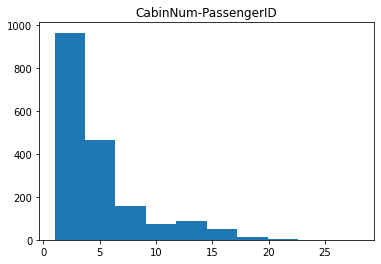

CabinDeck
A     256
B     779
C     747
D     478
E     876
F    2794
G    2559
T       5
Name: PassengerId, dtype: int64
CabinSide
P    4206
S    4288
Name: PassengerId, dtype: int64


In [8]:
plt.hist(train.groupby(by=["CabinNum"])["PassengerId"].count())
plt.title("CabinNum-PassengerID")
plt.show()

train["CabinNum"] = pd.to_numeric(train["CabinNum"])
test["CabinNum"] = pd.to_numeric(test["CabinNum"])

print(train.groupby(by=["CabinDeck"])["PassengerId"].count())

print(train.groupby(by=["CabinSide"])["PassengerId"].count())

In [9]:
train = train.drop("Cabin", axis=1)
test = test.drop("Cabin", axis=1)

train_dummy_colname = train[['HomePlanet', 'CryoSleep', 'Destination', 'VIP', "CabinDeck", "CabinNum", "CabinSide"]].columns
print(f"train_dummy_colname: {train_dummy_colname}")

train_drop = train.drop("PassengerId", axis=1)
train_drop.dropna(inplace=True)

display(train_drop)

train_dummy_colname: Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinDeck',
       'CabinNum', 'CabinSide'],
      dtype='object')


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabinDeck,CabinNum,CabinSide
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0.0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0.0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0.0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0.0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98.0,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499.0,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500.0,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608.0,S


In [10]:
df_data_list = []
for i in range(len(df_obj_colname)):
  df_colname = df.columns[i]
  df_data = pd.unique(df[df_colname])
  df_data_list.append(df_data)
df_data_list

[array(['Europa', 'Earth', 'Mars', nan], dtype=object),
 array([False, True, nan], dtype=object),
 array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
       dtype=object),
 array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object),
 array([39., 24., 58., 33., 16., 44., 26., 28., 35., 14., 34., 45., 32.,
        48., 31., 27.,  0.,  1., 49., 29., 10.,  7., 21., 62., 15., 43.,
        47.,  2., 20., 23., 30., 17., 55.,  4., 19., 56., nan, 25., 38.,
        36., 22., 18., 42., 37., 13.,  8., 40.,  3., 54.,  9.,  6., 64.,
        67., 61., 50., 41., 57., 11., 52., 51., 46., 60., 63., 59.,  5.,
        79., 68., 74., 12., 53., 65., 71., 75., 70., 76., 78., 73., 66.,
        69., 72., 77.])]

In [11]:
dataset = pd.get_dummies(train_drop[train_dummy_colname])

In [12]:
y = train["Transported"]

In [13]:
dataset.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    8,    9,   11,
            ...
            8681, 8682, 8683, 8685, 8686, 8688, 8689, 8690, 8691, 8692],
           dtype='int64', length=6606)

In [14]:
dataset

,CabinNum,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,...,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinSide_P,CabinSide_S
0,0.0,0,1,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,1,0
1,0.0,1,0,0,1,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0.0,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,0.0,0,1,0,1,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,1
4,1.0,1,0,0,1,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,98.0,0,1,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
8689,1499.0,1,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
8690,1500.0,1,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1
8691,608.0,0,1,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [15]:
y = y.iloc[dataset.index, ]

In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [17]:
dataset

,CabinNum,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,...,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinSide_P,CabinSide_S
0,0.0,0,1,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,1,0
1,0.0,1,0,0,1,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0.0,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,0.0,0,1,0,1,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,1
4,1.0,1,0,0,1,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,98.0,0,1,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
8689,1499.0,1,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
8690,1500.0,1,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1
8691,608.0,0,1,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [18]:
dataset["Transported"] = y

In [19]:
df = dataset

In [20]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1] 

In [21]:
X.to_csv("X.csv")
y.to_csv("y.csv")

In [22]:
X_scaled = (X-X.mean())/X.std()

In [69]:
class XGB_optuna:
    def __init__(self, X, y, method):
        self.X = X
        self.y = y
        self.method = method

    def validation(self):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.1, stratify=y)
        return self.X_train, self.X_test, self.y_train, self.y_test
        
    def under_sampling(self):
        X_train, X_test, y_train, y_test = self.validation()
        X_res, y_res = self.method.fit_resample(X_train, y_train) 
        return X_res, y_res

    def objective(self, trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 0, 1000), 
            'max_depth': trial.suggest_int('max_depth', 1, 20), 
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 20), 
            'subsample':trial.suggest_discrete_uniform('subsample', 0.5, 0.9, 0.1), 
            'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 0.9, 0.1),
            'verbose': 0
            }
        model = XGBClassifier(**params)
        X_res, y_res = self.under_sampling()
        model.fit(X_res, y_res)
        y_pred = model.predict(self.X_test)
        accuracy = accuracy_score(self.y_test, y_pred)
        return (1-accuracy)

    def find_params(self):
        study = optuna.create_study()
        study.optimize(self.objective, n_trials=300)
        return study.best_params

    def build_model(self):
        params = self.find_params()
        model = XGBClassifier(**params)
        X_res, y_res = self.under_sampling()
        model.fit(X_res, y_res)

        return model

In [70]:
method = RandomUnderSampler()

In [71]:
A = XGB_optuna(X_scaled, y, method)

In [75]:
X_train, X_test, y_train, y_test = A.validation()

In [72]:
study = A.build_model()

[I 2022-12-13 16:06:15,220] A new study created in memory with name: no-name-238b8a73-5a18-4dee-88b2-6b49f19d1107
<ipython-input-69-91650fae2564>:21: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample':trial.suggest_discrete_uniform('subsample', 0.5, 0.9, 0.1),
<ipython-input-69-91650fae2564>:22: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 0.9, 0.1),
[I 2022-12-13 16:06:16,877] Trial 0 finished with value: 0.31467473524962175 and parameters: {'n_estimators': 155, 'max_depth': 1, 'min_child_weight': 14, 'subsample': 0.7, 'colsample_bytree': 0.8}. Best

In [76]:
y_pred = study.predict(X_test)

In [77]:
accuracy_score(y_test, y_pred)

0.7776096822995462

In [ ]:
def XGBoostClassifier(X_train, X_test, y_train, y_test, study):
  model = XGBClassifier(params=study.best_params,
                  dtrain=X_train,
                  num_boost_round=1000,
                  early_stopping_rounds=5,
                  evals=[(y_train, "test")])
  model = model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  print("accuracy scores", accuracy_score(y_test, y_pred))
  metrics.roc_auc_score(y_test, y_pred)
  matrix = metrics.confusion_matrix(y_test, y_pred, normalize="all", labels=[False, True])
  ax = sns.heatmap(matrix, annot=True, cmap="Blues")
  
  y_proba = model.predict_proba(X_test)

  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba[:, 1])
  auc = metrics.auc(fpr, tpr)
  
  plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
  plt.legend()
  plt.xlabel('FPR: False positive rate')
  plt.ylabel('TPR: True positive rate')
  plt.grid()
  plt.show()